In [1]:
!pip install pycaret


In [2]:
import pandas as pd
from pycaret.regression import *

In [3]:
df=pd.read_csv('dataset.csv')

In [4]:
df['Mileage'] = df['Mileage'].str[0:4]
df['Engine'] = df['Engine'].str[0:4]
df['Power'] = df['Power'].str[0:-3]

In [5]:
df1 = df["Name"].str.split(" ", expand = True)


In [6]:
df["Manufacturer"] = df1[0]

In [7]:
df["Fuel_Type"] = df["Fuel_Type"].replace({'Diesel':1,'Petrol':2,'CNG':3,'LPG':4,'Electric':5})
df["Transmission"] = df["Transmission"].replace({'Manual':1,'Automatic':2})
df["Owner_Type"] = df["Owner_Type"].replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4})

In [8]:
df.drop(['New_Price','Unnamed: 0','Name'], axis=1,inplace=True)

In [9]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer
0,Mumbai,2010,72000,3,1,1,26.6,998,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,1,1,1,19.6,1582,126.2,5.0,12.50,Hyundai
2,Chennai,2011,46000,2,1,1,18.2,1199,88.7,5.0,4.50,Honda
3,Chennai,2012,87000,1,1,1,20.7,1248,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,1,2,2,15.2,1968,140.8,5.0,17.74,Audi


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   int64  
 4   Transmission       6019 non-null   int64  
 5   Owner_Type         6019 non-null   int64  
 6   Mileage            6017 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
 11  Manufacturer       6019 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 564.4+ KB


In [11]:
exp_reg = setup(data = df, target = 'Price',
                   normalize = True,session_id = 123)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Data shape,"(6019, 12)"
4,Train data shape,"(4213, 12)"
5,Test data shape,"(1806, 12)"
6,Numeric features,6
7,Categorical features,5
8,Rows with missing values,0.7%
9,Preprocess,True


In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [13]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.6735,15.3278,3.7146,0.8791,0.2073,0.2066,0.5970
lightgbm,Light Gradient Boosting Machine,1.8087,16.1507,3.8291,0.8741,0.2278,0.2408,0.3070
gbr,Gradient Boosting Regressor,1.7883,16.8427,3.8999,0.8686,0.2299,0.2292,0.4140
rf,Random Forest Regressor,1.9247,18.1670,4.0969,0.8548,0.2345,0.2433,0.9720
xgboost,Extreme Gradient Boosting,2.0717,21.1068,4.3706,0.8338,0.2689,0.3077,0.4450
knn,K Neighbors Regressor,2.0100,22.6734,4.5766,0.8197,0.2498,0.2352,0.0950
lr,Linear Regression,2.7525,32.2939,5.5131,0.7404,0.3596,0.4565,1.5520
ridge,Ridge Regression,2.7523,32.2959,5.5132,0.7404,0.3596,0.4564,0.0790
lar,Least Angle Regression,2.7525,32.2939,5.5131,0.7404,0.3596,0.4565,0.0810
br,Bayesian Ridge,2.7507,32.3126,5.5143,0.7403,0.3590,0.4556,0.0900


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [14]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5439,7.1849,2.6805,0.9329,0.1875,0.1904
1,2.0294,20.7514,4.5554,0.8676,0.2090,0.2040
2,1.5412,8.7602,2.9598,0.9256,0.1936,0.2002
3,1.5644,13.2975,3.6466,0.8645,0.2035,0.1994
4,1.4809,6.8924,2.6253,0.9234,0.2033,0.2140
5,1.4004,6.3835,2.5266,0.9271,0.1803,0.1863
6,2.1339,46.9278,6.8504,0.7538,0.2261,0.1896
7,1.6645,13.5373,3.6793,0.8860,0.1843,0.1967
8,1.6416,18.5731,4.3096,0.7946,0.2701,0.2771


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0286,11.0006,3.3167,0.8973,0.2778,0.3358
1,2.3225,23.0001,4.7958,0.8533,0.2695,0.2897
2,1.9876,11.6356,3.4111,0.9012,0.2937,0.3496
3,2.0287,22.0700,4.6979,0.7752,0.2758,0.3095
4,1.9316,11.7826,3.4326,0.8690,0.2906,0.3506
5,1.8168,7.9739,2.8238,0.9089,0.2562,0.2959
6,2.4389,53.6867,7.3271,0.7184,0.2986,0.3024
7,1.8527,14.9836,3.8709,0.8739,0.2509,0.2957
8,1.7952,11.6346,3.4110,0.8713,0.2982,0.3333


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
print(tuned_et)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


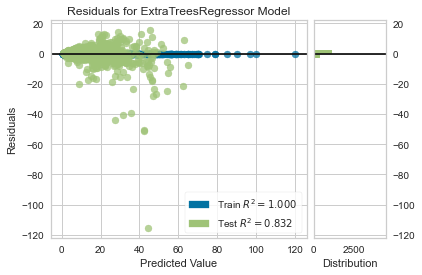

In [20]:
plot_model(tuned_et)

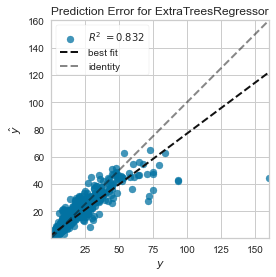

In [26]:
plot_model(tuned_et, plot = 'error')

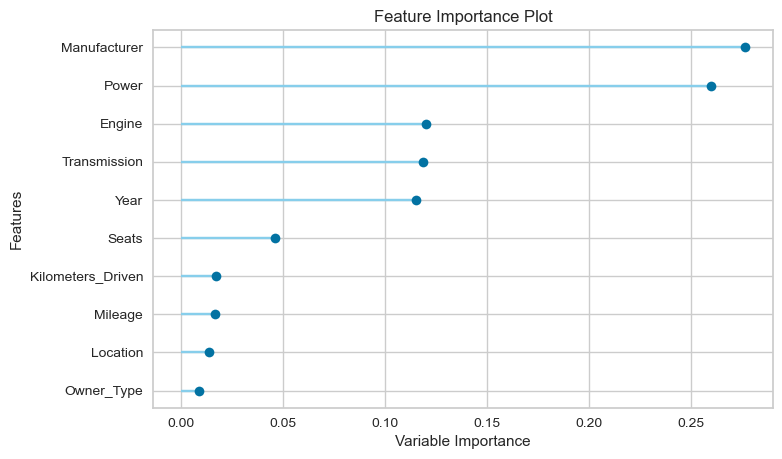

In [27]:
plot_model(tuned_et, plot = 'feature')

In [28]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [24]:
predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.8224,23.3264,4.8297,0.8317,0.2054,0.2005


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer,Price,prediction_label
4213,-0.775706,-0.431346,0.616080,-0.904514,1.591979,-0.44331,2.173311,0.866872,0.787405,2.136200,0.239612,13.50,16.0513
4214,0.023093,0.184257,-0.299749,-0.904514,-0.628149,-0.44331,-0.531204,-0.423982,-0.429778,-0.346539,-0.583445,4.75,5.0271
4215,-1.359388,-0.431346,0.193974,-0.904514,-0.628149,-0.44331,-0.704295,-0.423982,-0.429778,-0.346539,-0.583445,4.25,4.3892
4216,-0.775706,1.107661,-0.228132,-0.904514,1.591979,-0.44331,2.083356,2.061856,1.798313,-0.346539,2.206497,23.50,27.8844
4217,-0.638092,-1.354750,0.006371,-0.904514,-0.628149,-0.44331,0.048680,-0.595151,-0.377974,-0.346539,-0.517338,4.00,3.3259
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0.023093,-0.431346,0.287775,-0.904514,1.591979,-0.44331,0.359309,-0.215656,-0.187904,0.000000,1.899272,14.50,16.7579
6015,0.010988,-0.739147,-0.106190,0.977322,-0.628149,-0.44331,0.106074,-0.466341,-0.626894,-0.346539,-0.722350,3.00,2.6730
6016,1.107952,-1.354750,-0.040529,-0.904514,1.591979,-0.44331,2.685283,3.309344,0.021305,-0.346539,1.968315,13.50,15.4230
6017,0.032845,-0.123544,0.101870,-0.904514,1.591979,-0.44331,1.158643,1.096167,1.443883,-0.346539,1.968315,23.99,21.2452


In [29]:
final_et = finalize_model(tuned_et)
print(final_et)

Pipeline(memory=Memory(location=C:\Users\HP\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Year', 'Kilometers_Driven',
                                             'Fuel_Type', 'Transmission',
                                             'Owner_Type', 'Seats'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Location', 'Mileage', 'Engine',
                                             'Power', 'Manufacturer'],
                                    transformer=...
                                    transformer=LeaveOneOutEncoder(cols=['Location',
                                                                         'Mileage',
                                                                         'Engine',
                                                                         'Power',
                               

In [30]:
predict_model(final_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.2823,10.9048,3.3022,0.9213,0.1535,0.1449


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer,Price,prediction_label
4213,-0.775706,-0.431346,0.616080,-0.904514,1.591979,-0.44331,2.173311,0.866872,0.787405,2.136200,0.239612,13.50,16.0214
4214,0.023093,0.184257,-0.299749,-0.904514,-0.628149,-0.44331,-0.531204,-0.423982,-0.429778,-0.346539,-0.583445,4.75,4.7742
4215,-1.359388,-0.431346,0.193974,-0.904514,-0.628149,-0.44331,-0.704295,-0.423982,-0.429778,-0.346539,-0.583445,4.25,3.0247
4216,-0.775706,1.107661,-0.228132,-0.904514,1.591979,-0.44331,2.083356,2.061856,1.798313,-0.346539,2.206497,23.50,34.2206
4217,-0.638092,-1.354750,0.006371,-0.904514,-0.628149,-0.44331,0.048680,-0.595151,-0.377974,-0.346539,-0.517338,4.00,4.3381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0.023093,-0.431346,0.287775,-0.904514,1.591979,-0.44331,0.359309,-0.215656,-0.187904,0.000000,1.899272,14.50,15.0448
6015,0.010988,-0.739147,-0.106190,0.977322,-0.628149,-0.44331,0.106074,-0.466341,-0.626894,-0.346539,-0.722350,3.00,2.7291
6016,1.107952,-1.354750,-0.040529,-0.904514,1.591979,-0.44331,2.685283,3.309344,0.021305,-0.346539,1.968315,13.50,15.0516
6017,0.032845,-0.123544,0.101870,-0.904514,1.591979,-0.44331,1.158643,1.096167,1.443883,-0.346539,1.968315,23.99,18.3192


In [32]:
unseen_predictions = predict_model(final_et, data=df)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer,Price,prediction_label
0,-0.014459,-1.027139,0.145315,2.859119,-0.632529,-0.444554,-0.933945,-0.689811,-0.625053,-0.345849,-0.582096,1.75,1.75
1,-0.988558,0.502161,-0.194369,-0.905711,-0.632529,-0.444554,0.165663,-0.063359,0.181865,-0.345849,-0.485661,12.50,12.50
2,-0.615227,-0.721279,-0.139581,0.976704,-0.632529,-0.444554,-0.338381,-0.528962,-0.302115,-0.345849,-0.476661,4.50,4.50
3,-0.616316,-0.415419,0.309678,-0.905711,-0.632529,-0.444554,-0.023046,-0.427829,-0.390094,2.135710,-0.582510,6.00,6.00
4,2.002000,-0.109559,-0.197985,-0.905711,1.580955,1.746903,0.682862,1.050667,0.242183,-0.345849,1.901465,17.74,17.74


In [34]:
create_api(final_et, 'app')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python app.py


In [35]:
create_docker('app')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            
